In [1]:
import pigpio
import math
from time import sleep
import numpy as np


In [2]:

class TLV493D:
    
    """Class of 3D Magnetic Sensor TLV493D.
    """
                                                                                                                                                      
      
    bx = 0
    by = 0
    bz = 0 
    temp = 0
    data =[]
    pi = pigpio.pi()

    addr = 0x35
    channel = 1
    
    
    h = pi.i2c_open(channel, addr)
    (count, data) = pi.i2c_read_device(h, 23)
    print(count,"             ",data)
    
    
    

    def initialize(self): 
        """ Read data from register
        """
        global data
        
        self.pi.i2c_write_byte_data(self.h, 0x11, 21)
        self.pi.i2c_write_byte_data(self.h, 0x10, 32)
        sleep(60e-6)
        (count, data) = self.pi.i2c_read_device(self.h, 23)
        print(data) 
        
    def initialize_FM(self):
        self.pi.i2c_write_byte_data(self.h, 0x11, 0x13)
        self.pi.i2c_write_byte_data(self.h, 0x10, 0x00)
        sleep(60e-6)
        
    def update_data (self):
        global data
        (count, data) = self.pi.i2c_read_device(self.h, 6)
        # print(data)
        
    def get_x(self):
        """ Get the value of X coordinate
            
            Returns:
            
            int: X coordinate
        """
        
        self.bx = (data[0] << 8) or (((data[4] >> 4) & 0x0f)<<4)
        self.bx >>= 4
        
        self.bx *=0.13
            
        return self.bx
    
    
    
    
    def get_y(self):
        """ Get the value of Y coordinate
            
            Returns:
            
            int: Y coordinate
        """
        self.by = (data[1] << 8) or ((data[4] & 0x0f)<<4)
        self.by >>= 4
        
        self.by *=0.13          
        return self.by
    
    
    
    
    def get_z(self):
        """ Get the value of Z coordinate
            
            Returns:
            
            int: Z coordinate
        """
        
        self.bz = (data[2] << 8) or ((data[5] & 0x0f)<<4)
        
        self.bz >>= 4
        
        self.bz *=0.13
        return self.bz
    
    
    
    def get_br(self):
        """ Calculate the radial value
            
            Returns:
            
            double : radial value
        """
        
        br = math.sqrt(self.bx*self.bx+self.by*self.by+self.bz*self.bz)
        
        return br
    
    
    
    
    def get_polar(self):
        """ Calculate the polar value
            
            Returns:
            
            double: polar value
        """
        
        polar = math.cos(math.atan2(self.bz,math.sqrt(self.bx*self.bx+self.by*self.by)))
        
        return polar
    
    
    
    
    def get_azimuth(self):
        """ Calculate the azimuthal value
            
            Returns:
            
            double: azimuthal value
        """
        
        azimuth = math.atan2(self.by,self.bx)
        
        return azimuth
  



23               bytearray(b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff')


In [5]:
mat = np.zeros((1,3),dtype=np.float64)
tlv493d = TLV493D()
tlv493d.initialize()
# tlv493d.initialize_FM()
for i in range (10000):
    tlv493d.update_data()
    x = tlv493d.get_x()
    y = tlv493d.get_y()
    z = tlv493d.get_z()
    mat = np.vstack((mat, [x, y, z]))
    # print("x: ", x, "y: ", y, "z: ",z)
    # if (((x>0.26) and (x<300)) and ((y>0.26) and (y<300))):
    #     mat = np.vstack((mat, [x, y, z]))
    #     # print("x: ", x, "y: ", y, "z: ",z)
    sleep (200e-6)



bytearray(b'\x0f\x05\x12K\xa3D\xcf\x80\x7f\x80\x7f\x80\x7f888 \x154\x00\xff\xff\xc9')


In [25]:
# mat.tofile('data1.csv', sep = ',')
print(mat)
print(mat.shape)

[[0. 0. 0.]]
(1, 3)


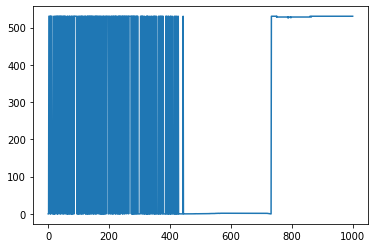

In [25]:
import matplotlib.pyplot as plt

plt.plot(mat[:,1])
 
# Showing the above plot
plt.show()

/home/pi/mic/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


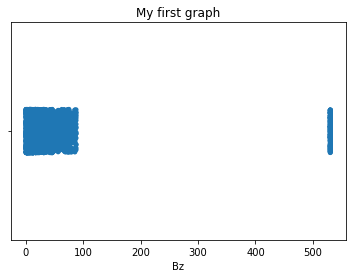

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
 

ax = sns.stripplot(mat[:,2])
 
# giving labels to x-axis and y-axis
ax.set(xlabel ='Bz')
 
# giving title to the plot
plt.title('My first graph')
 
# function to show plot
plt.show()